# `Setup`

In [67]:
# Library Import
import yaml
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import random

### `Config`

In [48]:
# Changing the working directory to the project directory
if not os.getcwd().split('/')[-1] == 'aml_itu':
    os.chdir('../')

print(os.getcwd())

/Users/rasmuskrebs/Documents/School/semester_3/advanced_ml/aml_itu


In [96]:
# Loading the config file
with open("config.yml", 'r') as stream:
    config = yaml.safe_load(stream)
    
    
# Training Images
train_img = config['dataset']['images']['train']

# Outputting config    
config

{'dataset': {'name': 'state-farm-distracted-driver-detection',
  'data': '../state-farm-distracted-driver-detection/driver_imgs_list.csv',
  'images': {'train': '../state-farm-distracted-driver-detection/imgs/train',
   'test': '../state-farm-distracted-driver-detection/imgs/test'},
  'class_mapping': {'c0': 'safe driving',
   'c1': 'texting - right',
   'c2': 'talking on the phone - right',
   'c3': 'texting - left',
   'c4': 'talking on the phone - left',
   'c5': 'operating the radio',
   'c6': 'drinking',
   'c7': 'reaching behind',
   'c8': 'hair and makeup',
   'c9': 'talking to passenger'}}}

In [57]:
# Loading the data
df = pd.read_csv(config['dataset']['data'])

In [58]:
config['dataset']['class_mapping']

{'c0': 'safe driving',
 'c1': 'texting - right',
 'c2': 'talking on the phone - right',
 'c3': 'texting - left',
 'c4': 'talking on the phone - left',
 'c5': 'operating the radio',
 'c6': 'drinking',
 'c7': 'reaching behind',
 'c8': 'hair and makeup',
 'c9': 'talking to passenger'}

## `Data Exploration`

In [59]:
df['target'] = df['classname'].map(config['dataset']['class_mapping'])

In [65]:
# class distribution  
df.target.value_counts(normalize=True)

safe driving                    0.110997
texting - left                  0.104620
talking on the phone - left     0.103728
drinking                        0.103684
talking on the phone - right    0.103327
operating the radio             0.103104
texting - right                 0.101097
talking to passenger            0.094943
reaching behind                 0.089279
hair and makeup                 0.085221
Name: target, dtype: float64

In [106]:
# Subject distribution
print('Total number of subjects in dataset: ', df.subject.nunique())
df.subject.value_counts(normalize=True)

Total number of subjects in dataset:  26


p021    0.055164
p022    0.054986
p024    0.054674
p026    0.053336
p016    0.048073
p066    0.046111
p049    0.045086
p051    0.041027
p014    0.039065
p015    0.039021
p035    0.037817
p047    0.037237
p081    0.036702
p012    0.036702
p064    0.036568
p075    0.036300
p061    0.036077
p056    0.035408
p050    0.035230
p052    0.033000
p002    0.032331
p045    0.032287
p039    0.029031
p041    0.026980
p042    0.026356
p072    0.015430
Name: subject, dtype: float64

In [87]:
# Generate random list of indexs
random_list = random.sample(range(0, len(df)), 9)

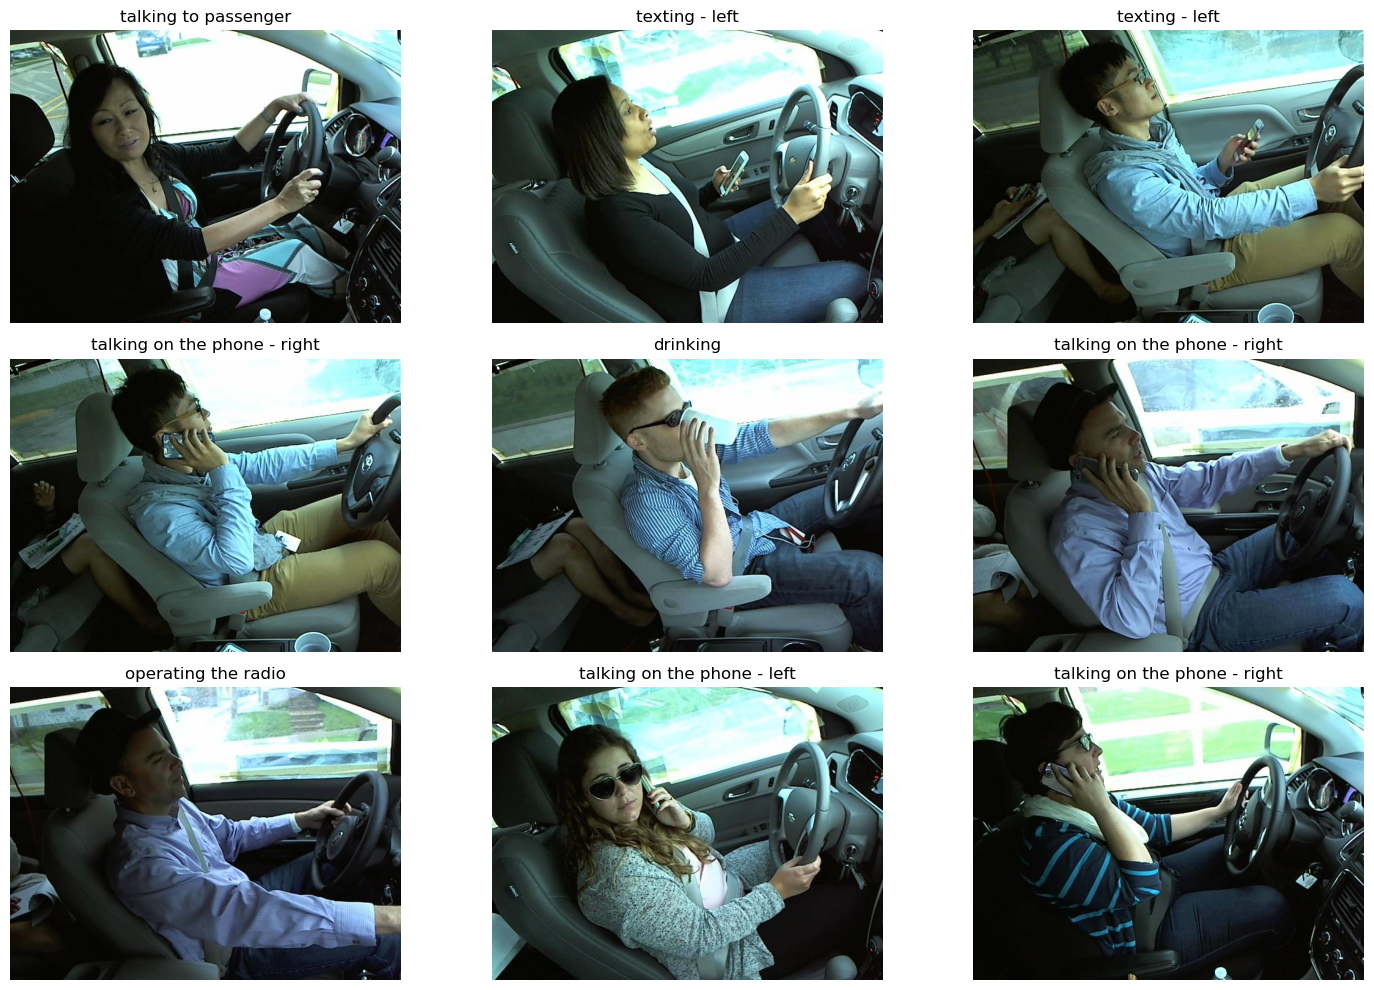

In [97]:
# Plotting the images
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    img = Image.open(os.path.join(train_img, df.iloc[random_list[i]].classname, df.iloc[random_list[i]].img))
    ax.imshow(img)
    ax.set_title(df.iloc[random_list[i]].target)
    ax.axis('off')
fig.tight_layout()

In [122]:
# Importing random image as numpy array
img = Image.open(os.path.join(train_img, df.iloc[random_list[0]].classname, df.iloc[random_list[0]].img))

# Transforming the image to numpy array
img = np.array(img)

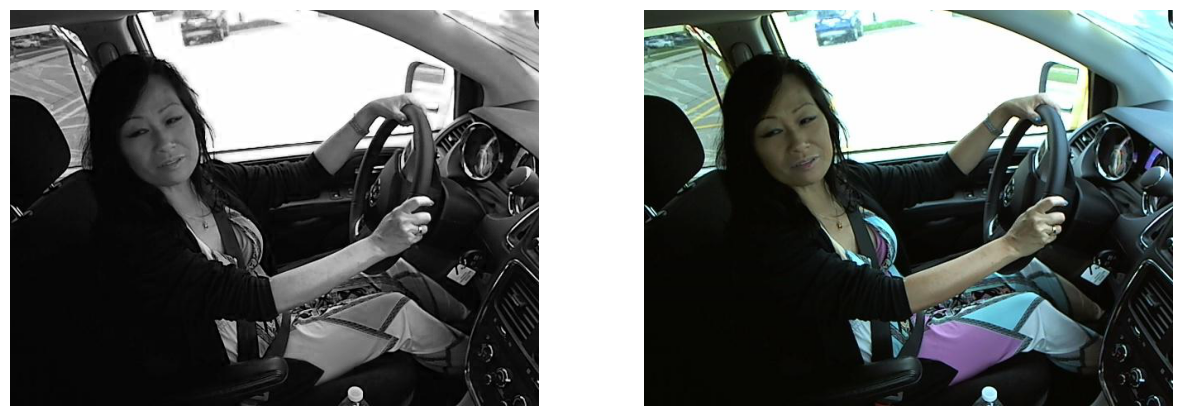

In [137]:
# Plotting grey version and colored
fig, axes = plt.subplots(1, 2, figsize=(15, 18))
for i, ax in enumerate(axes.flat):
    if i == 0:
        ax.imshow(img[:,:,i], cmap='gray')
    else:
        ax.imshow(img)
    ax.axis('off')